In [2]:
import sys
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# 1. 공간 필터링

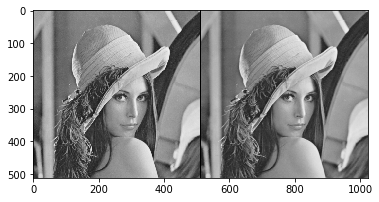

In [5]:
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(1, src.shape[0]-1) :
    for c in range(1, src.shape[1]-1) :    
        sum = ( int(src[r,c-1]) + src[r,c] + src[r,c+1] ) / 3
        dst[r,c] = sum                
imshow("", np.hstack((src, dst)))

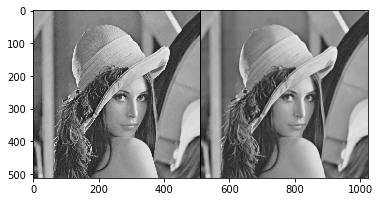

In [10]:
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(1, src.shape[0]-1) :
    for c in range(1, src.shape[1]-1) :    
        sum = 0
        for r1 in range(-1,2) :
            for c1 in range(-1, 2) :
                sum += src[r + r1, c + c1]
        dst[r,c] = sum / 9               
imshow("", np.hstack((src, dst)))

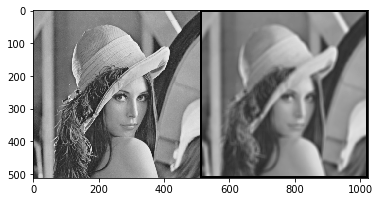

In [12]:
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(5, src.shape[0]-5) :
    for c in range(5, src.shape[1]-5) :    
        sum = 0
        for r1 in range(-5,6) :
            for c1 in range(-5, 6) :
                sum += src[r + r1, c + c1]
        dst[r,c] = sum / (11*11)
imshow("", np.hstack((src, dst)))

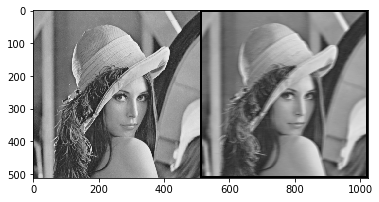

In [13]:
# 모션 블러
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(5, src.shape[0]-5) :
    for c in range(5, src.shape[1]-5) :    
        sum = 0
        for c1 in range(-5, 6) :
            sum += src[r + r1, c + c1]
        dst[r,c] = sum / 11
imshow("", np.hstack((src, dst)))

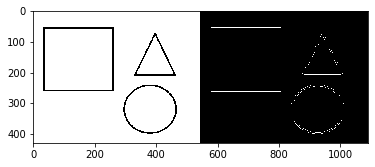

In [7]:
src = cv2.imread('box.png', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(1, src.shape[0]-1) :
    for c in range(1, src.shape[1]-1) :    
        #out = np.abs(int(src[r,c]) - src[r,c+1]) # -255 ~ 255
        out = np.abs(int(src[r,c]) - src[r-1,c]) # -255 ~ 255        
        dst[r,c] = out  

dst = (dst > 50)*255
dst = dst.astype('uint8')
imshow("", np.hstack((src, dst)))

cv2.imshow('dst', np.hstack((src, dst)))
cv2.waitKey()
cv2.destroyAllWindows()


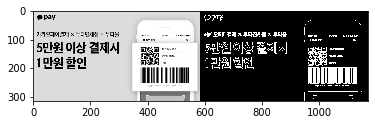

In [19]:
src = cv2.imread('ocr3.png', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(1, src.shape[0]-1) :
    for c in range(1, src.shape[1]-1) :    
        #out = np.abs(int(src[r,c]) - src[r,c+1]) # -255 ~ 255
        out = np.abs(int(src[r,c]) - src[r,c-1]) # -255 ~ 255        
        out2 = np.abs(int(src[r,c]) - src[r-1,c]) # -255 ~ 255                
        dst[r,c] = (out  + out2)  /2 

dst = (dst > 20)*255
dst = dst.astype('uint8')
imshow("", np.hstack((src, dst)))

cv2.imshow('dst', np.hstack((src, dst)))
cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
mask = np.array([
    [1/9.0 , 1/9.0, 1/9.0, ],
    [1/9.0 , 1/9.0, 1/9.0, ],
    [1/9.0 , 1/9.0, 1/9.0, ],
])
print(mask)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


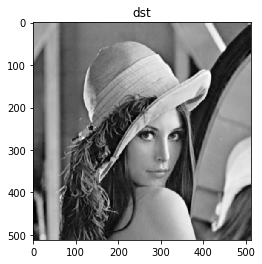

uint8


In [25]:
src = cv2.imread("lenna.bmp",0)
dst = cv2.filter2D(src, -1, mask)
imshow("dst", dst)
print(dst.dtype)

In [26]:
mask = np.array([
    [0, 0,  0],
    [0, 1 , -1],
    [0, 0,  0]
])
print(mask)  # 

[[ 0  0  0]
 [ 0  1 -1]
 [ 0  0  0]]


In [33]:
src = src.astype('float')

In [36]:
dst = cv2.filter2D(src, -1, mask)
print(dst.dtype)
print(dst)

float64
[[  0.   0.   1. ...  15.  27. -27.]
 [  0.   0.   1. ...  15.  27. -27.]
 [  0.   0.   1. ...  15.  27. -27.]
 ...
 [  0.  -7.   3. ...   4.   2.  -2.]
 [  0. -11.   4. ...  -1.  -3.   3.]
 [  0. -11.   4. ...  -1.  -3.   3.]]


In [37]:
dst = cv2.convertScaleAbs(dst)
print(dst)
print(dst.dtype)

[[ 0  0  1 ... 15 27 27]
 [ 0  0  1 ... 15 27 27]
 [ 0  0  1 ... 15 27 27]
 ...
 [ 0  7  3 ...  4  2  2]
 [ 0 11  4 ...  1  3  3]
 [ 0 11  4 ...  1  3  3]]


## emboss

In [3]:
src= cv2.imread('rose.bmp', 0)
emboss = np.array([[-1, -1, 0], 
                  [-1, 0, 1],
                  [0,1,1]], np.float32)

dst=cv2. filter2D(src, -1, emboss, delta=128)
cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

## 샤프닝
- 3by3에서 가운데만 9이고, 나머지는 -1인
- 다 더해서 1이 나오는건 원래 영상을유지함

In [6]:
src= cv2.imread('rose.bmp', 0)
sharp = np.array([[-1, -1, -1], 
                  [-1, 9, -1],
                  [-1,-1,-1]], np.float32)

dst=cv2. filter2D(src, -1, sharp)
cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
#적당히 조정
src= cv2.imread('rose.bmp', 0)
sharp = np.array([[0, -1, 0], 
                  [-1, 5, -1],
                  [0,-1,0]], np.float32)

dst=cv2. filter2D(src, -1, sharp)
cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()